C:\Users\anabi\AppData\Local\Temp\ipykernel_12572\1726546912.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


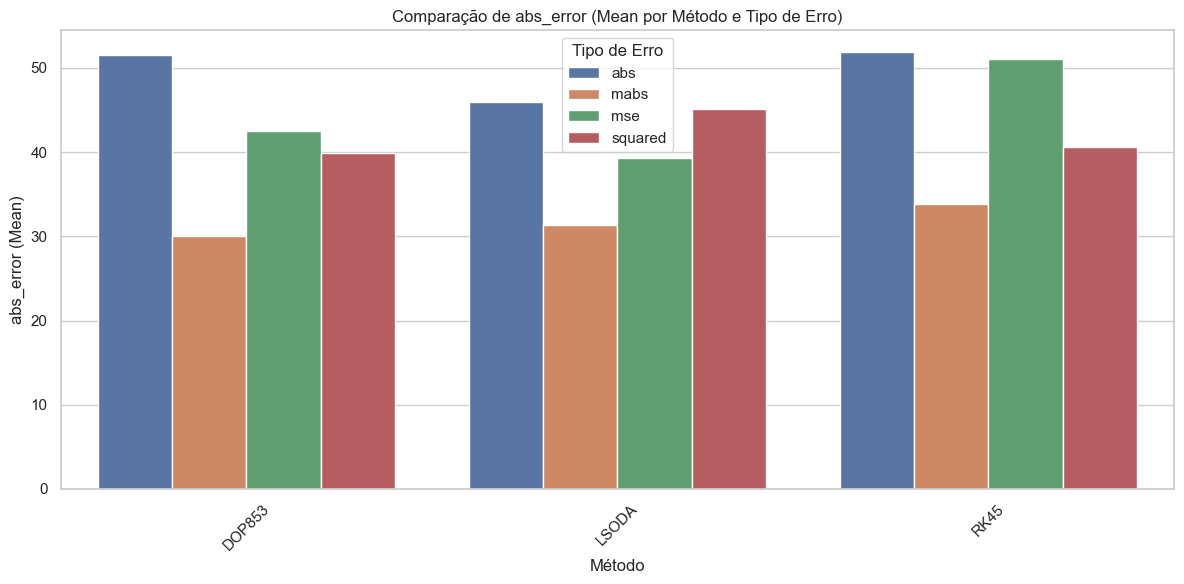

C:\Users\anabi\AppData\Local\Temp\ipykernel_12572\1726546912.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


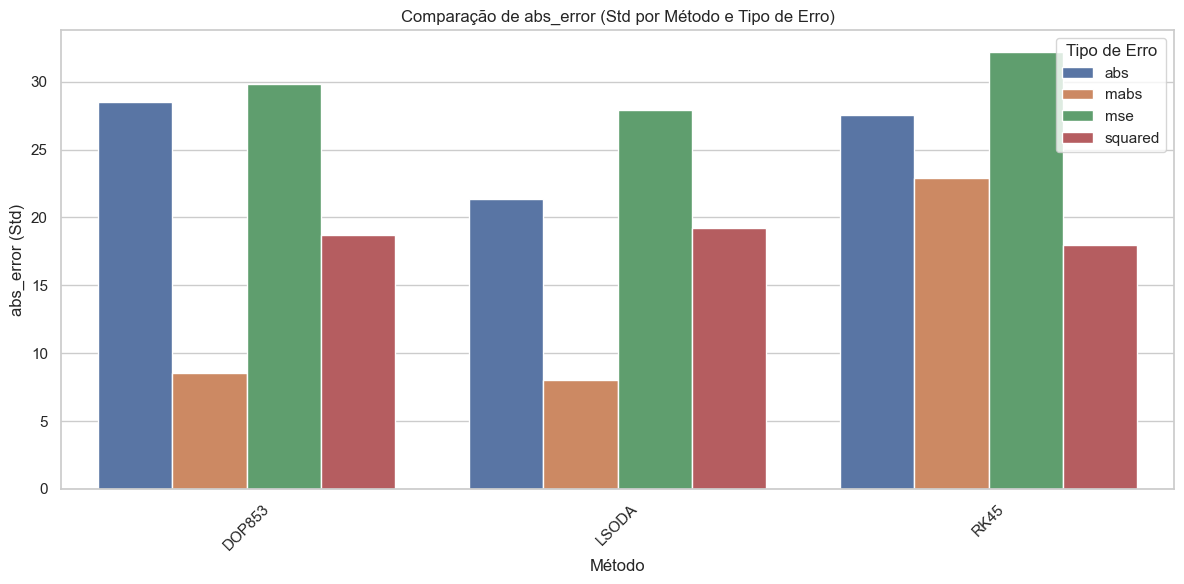

C:\Users\anabi\AppData\Local\Temp\ipykernel_12572\1726546912.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


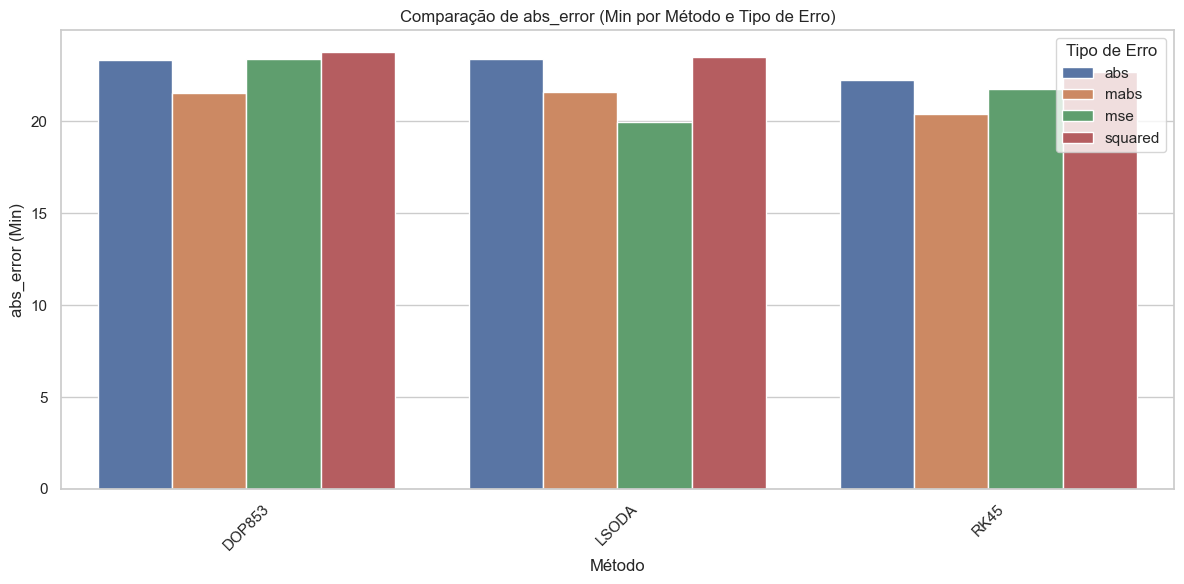

C:\Users\anabi\AppData\Local\Temp\ipykernel_12572\1726546912.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


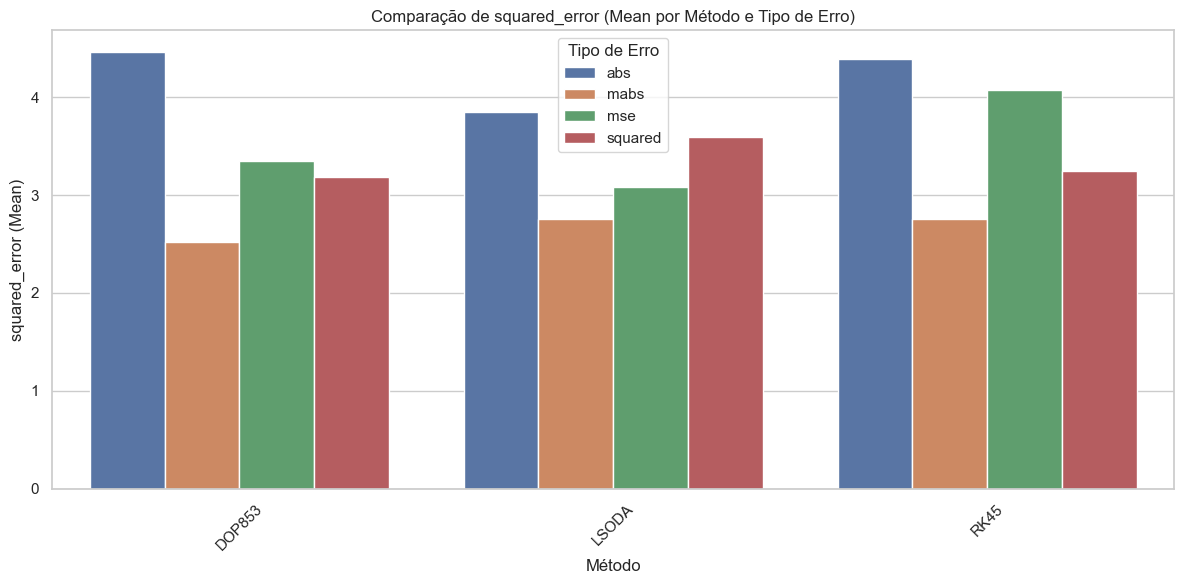

C:\Users\anabi\AppData\Local\Temp\ipykernel_12572\1726546912.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


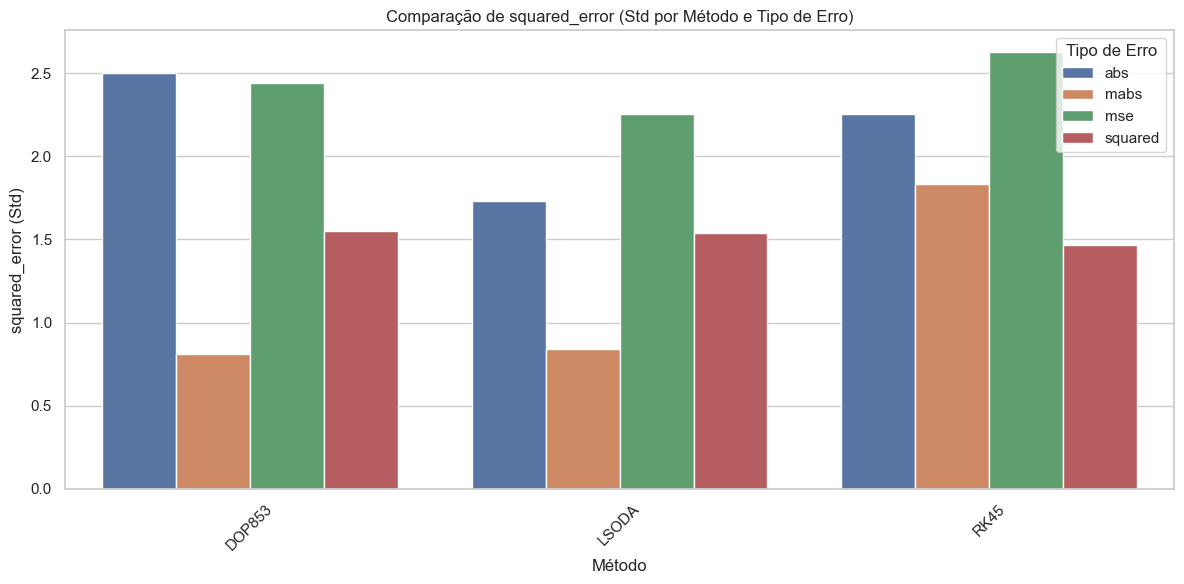

C:\Users\anabi\AppData\Local\Temp\ipykernel_12572\1726546912.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


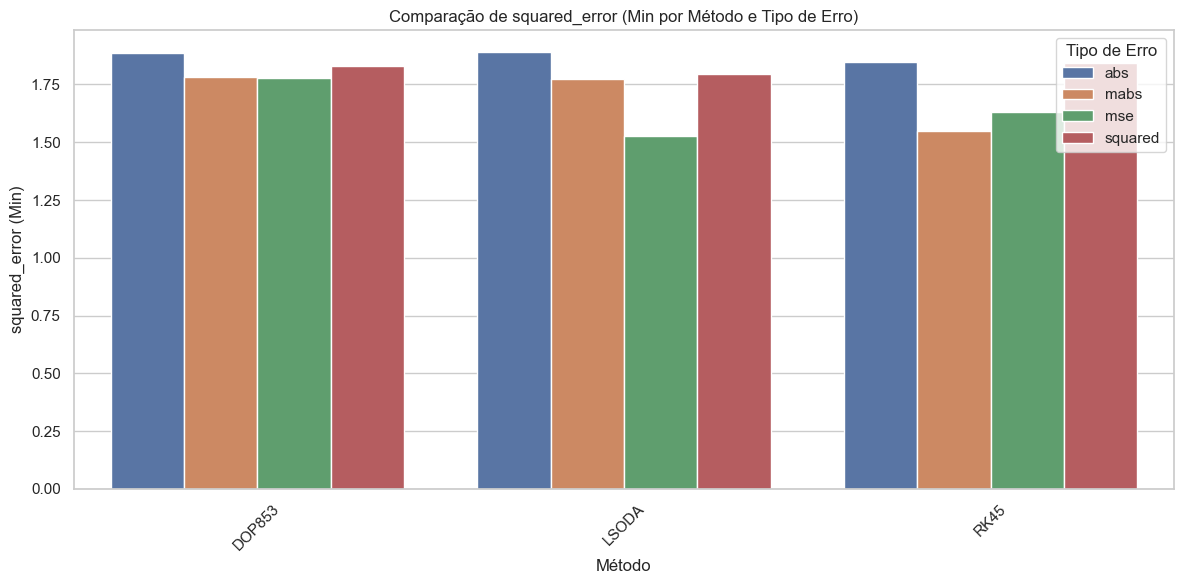

C:\Users\anabi\AppData\Local\Temp\ipykernel_12572\1726546912.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


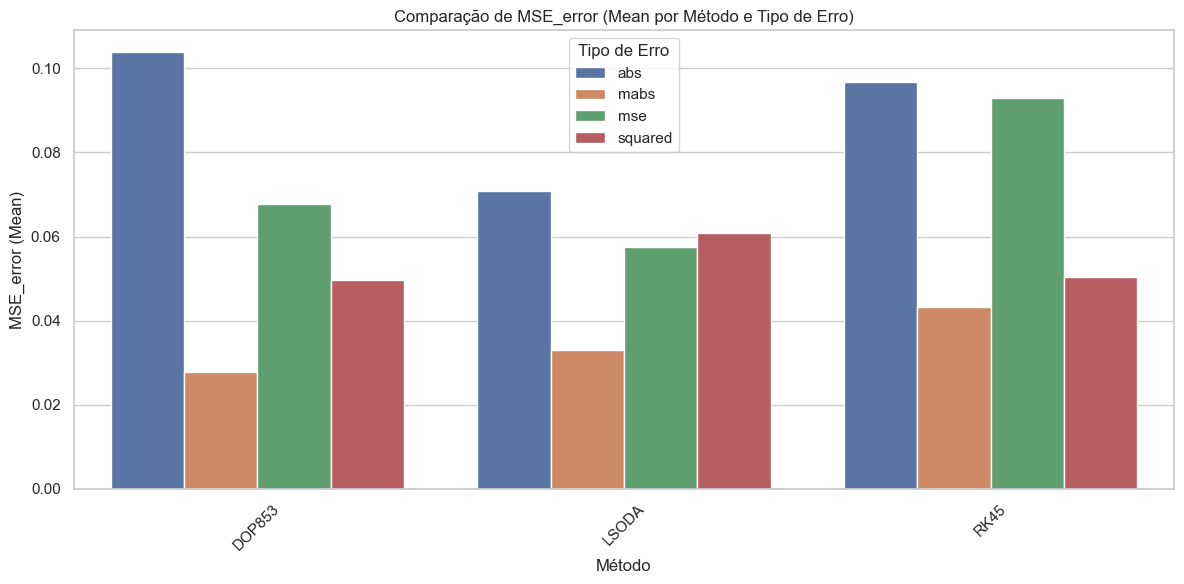

C:\Users\anabi\AppData\Local\Temp\ipykernel_12572\1726546912.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


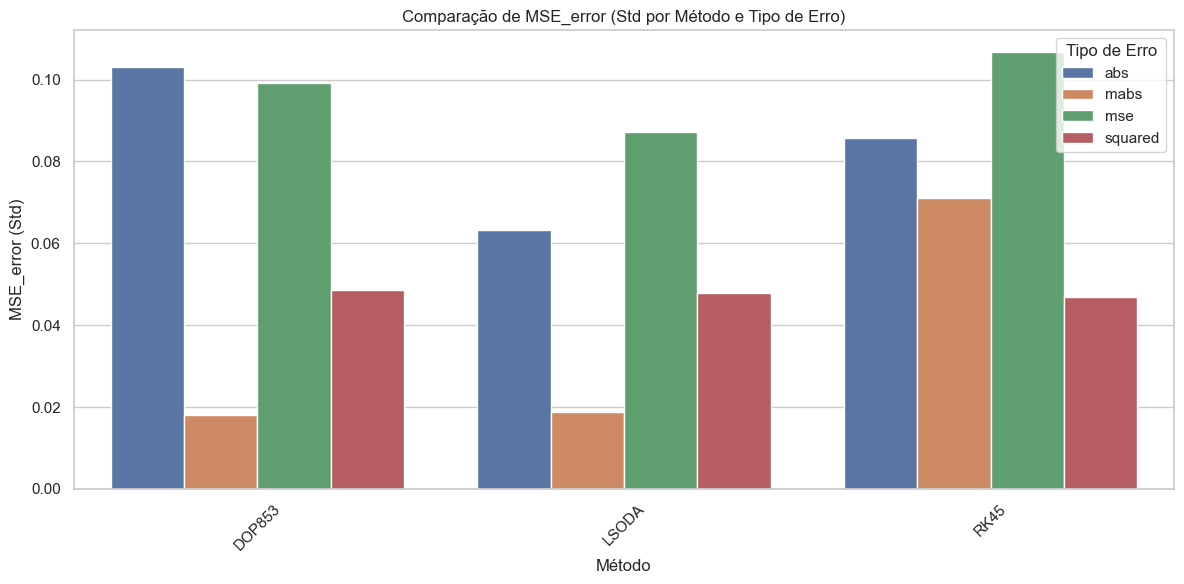

C:\Users\anabi\AppData\Local\Temp\ipykernel_12572\1726546912.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


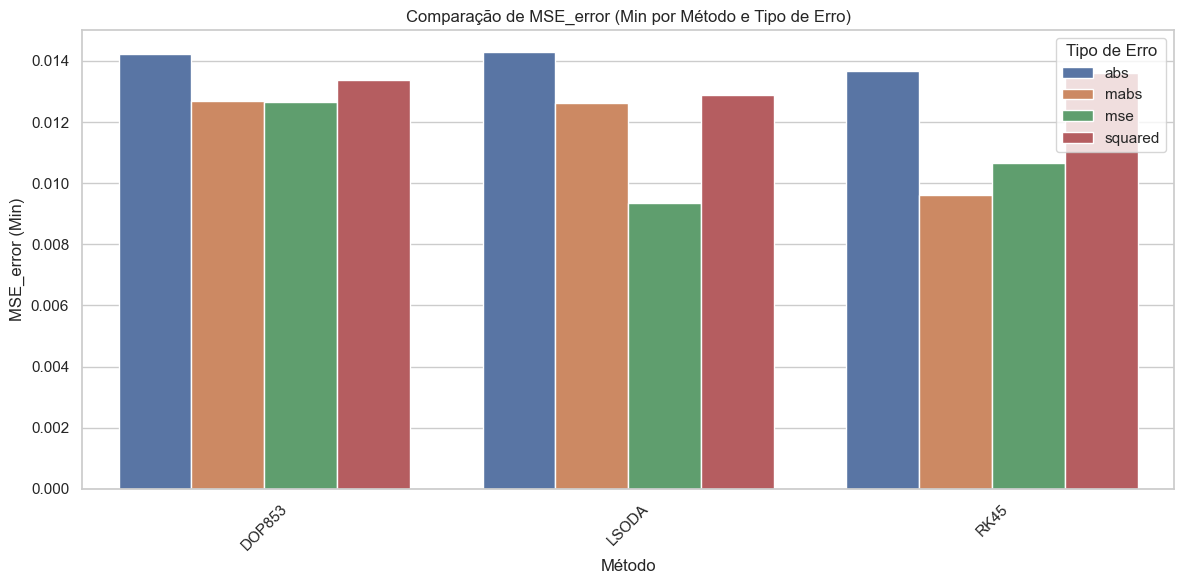

C:\Users\anabi\AppData\Local\Temp\ipykernel_12572\1726546912.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


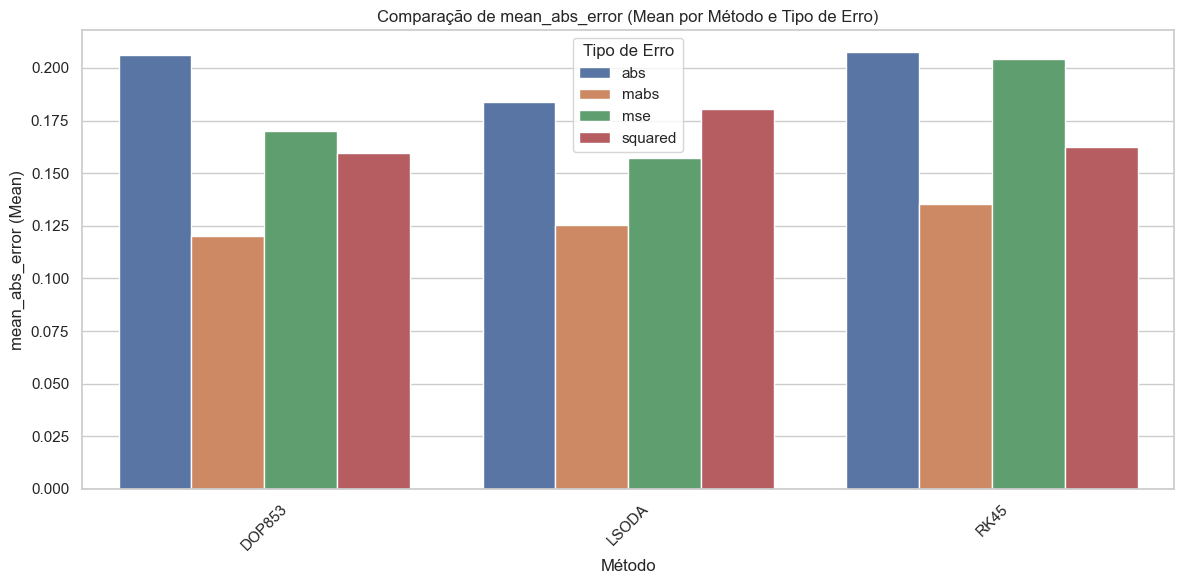

C:\Users\anabi\AppData\Local\Temp\ipykernel_12572\1726546912.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


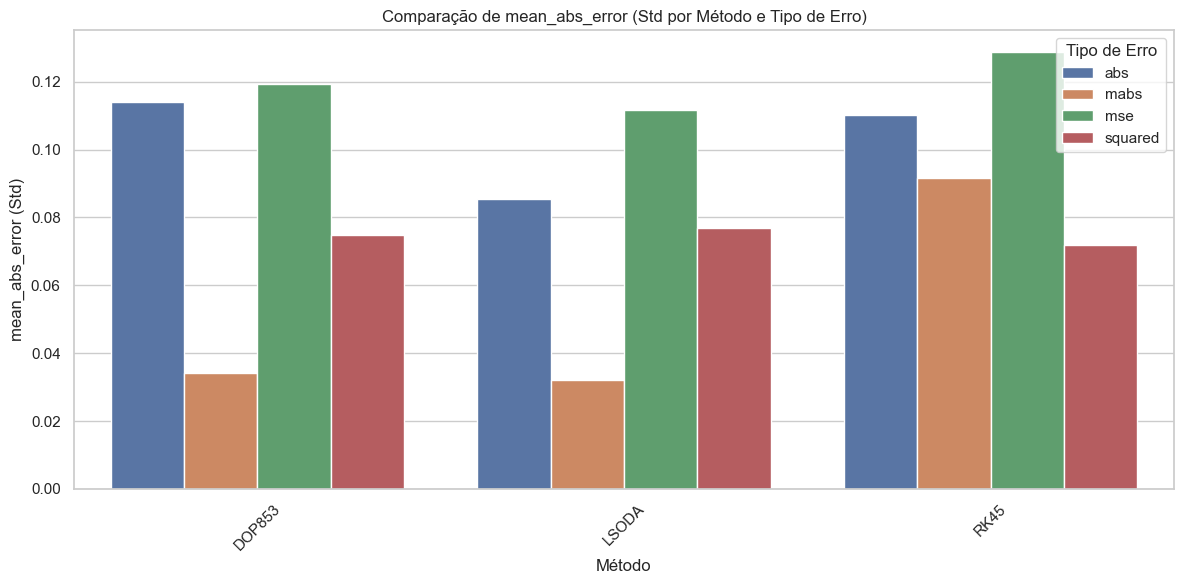

C:\Users\anabi\AppData\Local\Temp\ipykernel_12572\1726546912.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


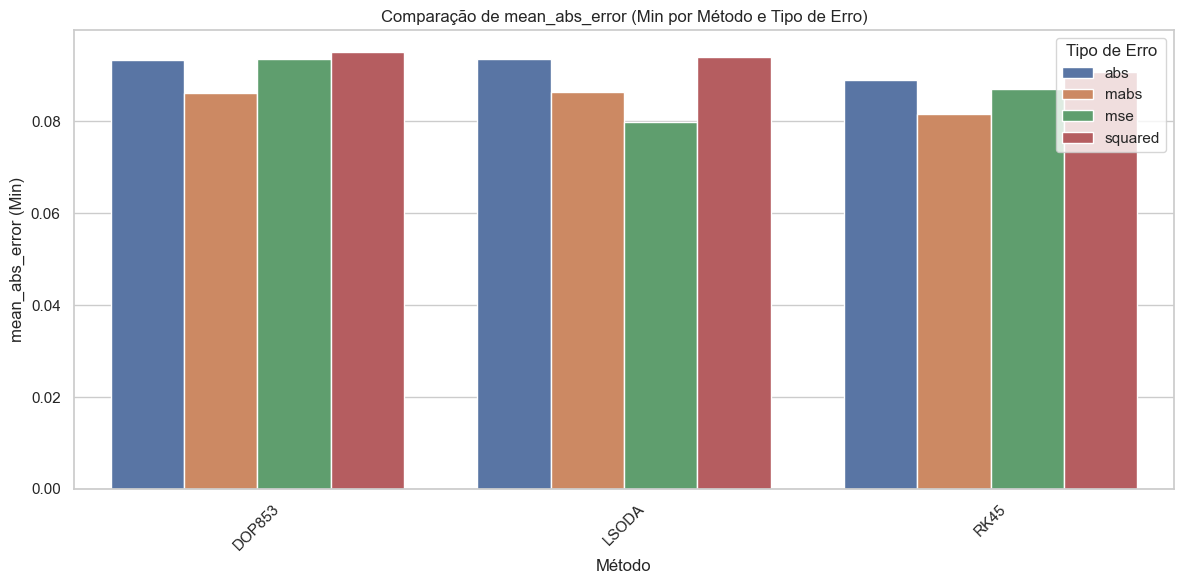

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
# Substitua 'arquivo.csv' pelo caminho para o seu arquivo
file_path = 'results.csv'
data = pd.read_csv(file_path)

# Validar se as colunas esperadas estão presentes
expected_columns = [
    'best_ind', 'error_type', 'method', 'seed', 'abs_error', 
    'squared_error', 'MSE_error', 'mean_abs_error', 'execution_time'
]
if not set(expected_columns).issubset(data.columns):
    raise ValueError(f"O arquivo CSV deve conter as colunas: {expected_columns}")

# Agrupar por método e tipo de erro e calcular estatísticas
results = data.groupby(['method', 'error_type']).agg({
    'abs_error': ['mean', 'std', 'max', 'min'],
    'squared_error': ['mean', 'std', 'max', 'min'],
    'MSE_error': ['mean', 'std', 'max', 'min'],
    'mean_abs_error': ['mean', 'std', 'max', 'min'],
    'execution_time': 'mean'
}).reset_index()

# Renomear as colunas para facilitar
results.columns = ['method', 'error_type'] + [
    f"{metric}_{stat}" for metric in ['abs_error', 'squared_error', 'MSE_error', 'mean_abs_error']
    for stat in ['mean', 'std', 'max', 'min']
] + ['execution_time_mean']

# Salvar os resultados em um arquivo CSV (opcional)
results.to_csv('estatisticas_resultados.csv', index=False)

# Criar gráficos comparativos para média, desvio padrão e valores mínimos
sns.set(style="whitegrid")
metrics = ['abs_error', 'squared_error', 'MSE_error', 'mean_abs_error']
statistics = ['mean', 'std', 'min']  # Estatísticas que você deseja plotar

for metric in metrics:
    for stat in statistics:
        plt.figure(figsize=(12, 6))
        sns.barplot(
            data=results, 
            x='method', 
            y=f'{metric}_{stat}', 
            hue='error_type',
            ci=None
        )
        plt.title(f'Comparação de {metric} ({stat.capitalize()} por Método e Tipo de Erro)')
        plt.xlabel('Método')
        plt.ylabel(f'{metric} ({stat.capitalize()})')
        plt.legend(title='Tipo de Erro')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'{metric}_{stat}_comparacao.png')
        plt.show()

# Exibir estatísticas calculadas no notebook


In [14]:
for metric in metrics:
    for stat in statistics:
        print(results['method'].iloc[0])
        print(results[f"{metric}_{stat}"])


DOP853
0     51.505998
1     30.066932
2     42.497238
3     39.944177
4     45.965682
5     31.388154
6     39.301564
7     45.104773
8     51.864483
9     33.875440
10    51.025240
11    40.567300
Name: abs_error_mean, dtype: float64
DOP853
0     28.514799
1      8.580065
2     29.809843
3     18.743488
4     21.360393
5      8.012688
6     27.950978
7     19.249209
8     27.535929
9     22.929443
10    32.172302
11    17.978404
Name: abs_error_std, dtype: float64
DOP853
0     23.326967
1     21.568383
2     23.425654
3     23.767843
4     23.395570
5     21.612469
6     19.952487
7     23.529858
8     22.232095
9     20.425509
10    21.754543
11    22.677180
Name: abs_error_min, dtype: float64
DOP853
0     4.456747
1     2.520927
2     3.351367
3     3.184553
4     3.847168
5     2.758875
6     3.082839
7     3.596396
8     4.387984
9     2.757664
10    4.075792
11    3.246171
Name: squared_error_mean, dtype: float64
DOP853
0     2.501804
1     0.814538
2     2.443157
3     1.550768

In [26]:
results[['method', 'abs_error_mean', 'error_type']]

,method,abs_error_mean,error_type
0,DOP853,51.505998,abs
1,DOP853,30.066932,mabs
2,DOP853,42.497238,mse
3,DOP853,39.944177,squared
4,LSODA,45.965682,abs
5,LSODA,31.388154,mabs
6,LSODA,39.301564,mse
7,LSODA,45.104773,squared
8,RK45,51.864483,abs
9,RK45,33.875440,mabs
